<a href="https://colab.research.google.com/github/bharadwaj-narayanam/IPL-data-analysis/blob/main/CH_BHARADWAJ_NARAYANAM_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
teams = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/teams.csv")
matches = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/matches.csv",parse_dates=['date'])
teamwise_home_and_away = pd.read_csv('/content/drive/MyDrive/Almabetter Data/IPL Data/teamwise_home_and_away.csv')
mostRuns_avg_strikerate = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/most_runs_average_strikerate.csv")
deliveries = pd.read_csv("/content/drive/MyDrive/Almabetter Data/IPL Data/deliveries.csv")
players = pd.read_excel("/content/drive/MyDrive/Almabetter Data/IPL Data/Players.xlsx")

### Teams
Contain the names of all the teams.
### Matches
Details of all matches from 2017-2019
### teamwise_home_and_away
details of the team winning at home and away
### mostRuns_avg_strikerate
Details of batsman, total_runs, outs, number_of_balls, average, strikerate
### deliveries
Details of every ball delivered 
### Players
Player details

In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

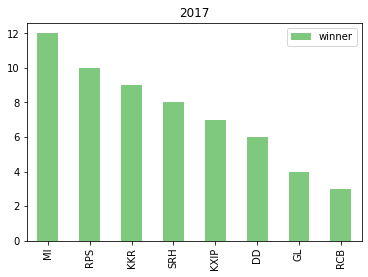

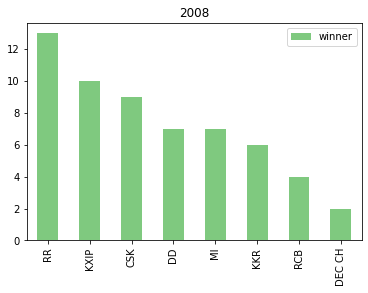

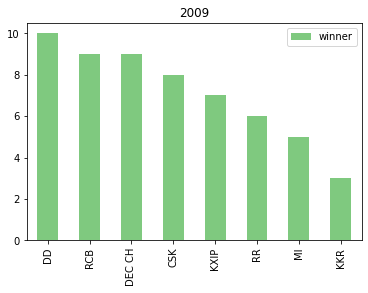

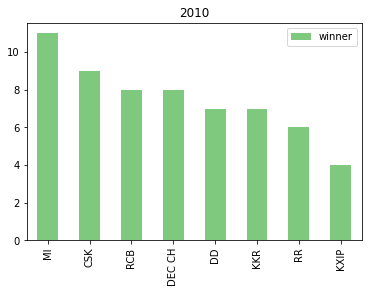

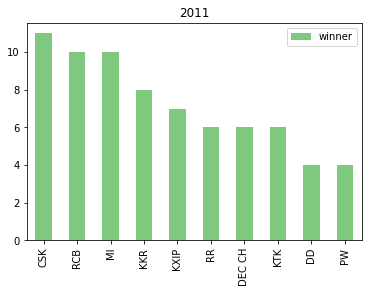

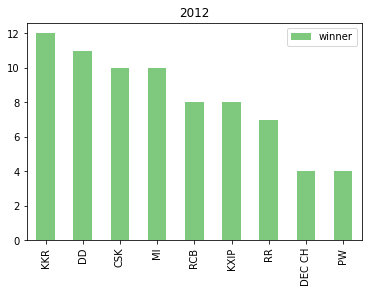

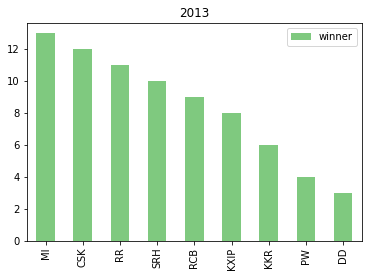

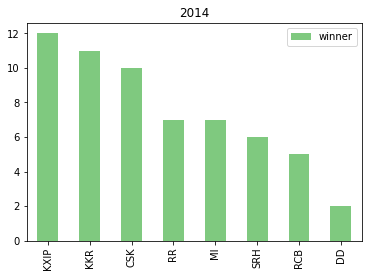

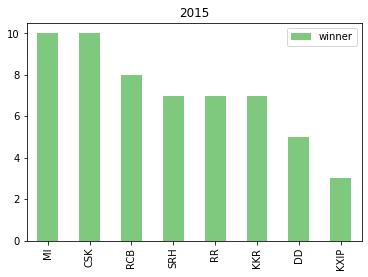

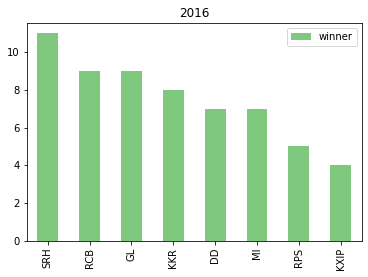

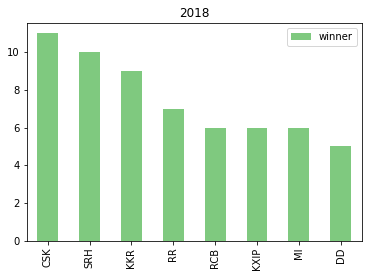

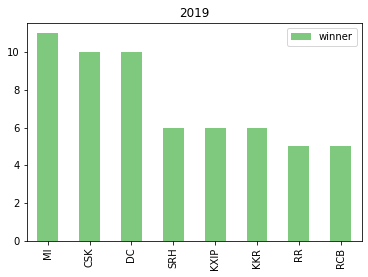

In [13]:
for i in matches['date'].dt.year.unique():
  df = pd.DataFrame(matches[matches['date'].dt.year == i]['winner'].replace({'Mumbai Indians':"MI",
                                                                             'Rising Pune Supergiant':"RPS",
                                                                             'Rising Pune Supergiants':"RPS",
                                                                             'Kolkata Knight Riders':"KKR",
                                                                             'Sunrisers Hyderabad':"SRH",
                                                                             'Kings XI Punjab':"KXIP",
                                                                             'Delhi Daredevils':"DD",
                                                                             'Gujarat Lions':"GL",
                                                                             'Royal Challengers Bangalore':"RCB",
                                                                             'Chennai Super Kings':"CSK",
                                                                             'Rajasthan Royals':"RR",
                                                                             'Delhi Capitals':"DC",
                                                                             'Deccan Chargers': "DEC CH",
                                                                             'Kochi Tuskers Kerala':"KTK",
                                                                             'Pune Warriors':"PW"}).value_counts())
  df.plot(kind='bar',colormap='Accent')
  plt.title(i)

# Toss winning effect on actual winning of the match

In [14]:
matches['year'] = matches['date'].dt.year

In [15]:
df = pd.DataFrame(matches[matches['date'].dt.year == 2010]['winner'].value_counts())

In [16]:
df

,winner
Mumbai Indians,11
Chennai Super Kings,9
Deccan Chargers,8
Royal Challengers Bangalore,8
Delhi Daredevils,7
Kolkata Knight Riders,7
Rajasthan Royals,6
Kings XI Punjab,4


In [17]:
df1 = pd.DataFrame(matches[matches['year']==2010]['toss_winner'].value_counts())

In [18]:
df1

,toss_winner
Chennai Super Kings,10
Deccan Chargers,9
Mumbai Indians,9
Delhi Daredevils,8
Kolkata Knight Riders,7
Royal Challengers Bangalore,6
Rajasthan Royals,6
Kings XI Punjab,5


In [19]:
df['toss_winner'] = df1['toss_winner']

In [20]:
df

,winner,toss_winner
Mumbai Indians,11,9
Chennai Super Kings,9,10
Deccan Chargers,8,9
Royal Challengers Bangalore,8,6
Delhi Daredevils,7,8
Kolkata Knight Riders,7,7
Rajasthan Royals,6,6
Kings XI Punjab,4,5


In [21]:
df.corr()

,winner,toss_winner
winner,1.000000,0.778499
toss_winner,0.778499,1.000000


# Now that we know which teams won the most matches in three seasons, let us compare each and every aspect of the leading team with the other teams.

### Let us analyse the boundaries hit by all teams in 2017 and compare it with MI. This is to compare the strength of hard hitters of MI and other teams.

### Also compare ones, twos and three's to get an idea of batsman coordination.

In [ ]:
def bdrs_1_2_3_4_6(match_id):
  '''Returns Total boundaries, Boundaries at death and ones, twos and threes by both teams if year and match id are given as arguments'''
  
  year = int(matches['Season'][matches['id']==match_id].iloc[0][-4:])
  first_match = deliveries[deliveries['match_id'].isin(matches[matches['date'].dt.year == year]['id'])][deliveries[deliveries['match_id'].isin(matches[matches['date'].dt.year == year]['id'])]['match_id']==match_id]
  first_match.reset_index(drop=True,inplace=True)
  boundary_count = {}
  one_2_3_count = {}
  for i in range(len(first_match)):
    if first_match.loc[i,'batsman_runs'] >= 4:
      if first_match.loc[i,'batting_team'] in list(boundary_count.keys()):
        boundary_count[first_match.loc[i,'batting_team']] = boundary_count[first_match.loc[i,'batting_team']] + 1
      else:
        boundary_count[first_match.loc[i,'batting_team']] = 1
    elif first_match.loc[i,'batsman_runs']==1:
      if first_match.loc[i,'batting_team'] in list(one_2_3_count.keys()):
        if 'Ones' in list(one_2_3_count[first_match.loc[i,'batting_team']].keys()):
          one_2_3_count[first_match.loc[i,'batting_team']]["Ones"] = one_2_3_count[first_match.loc[i,'batting_team']]["Ones"]+1
        else:
          one_2_3_count[first_match.loc[i,'batting_team']]["Ones"] = 1
      else:
        one_2_3_count[first_match.loc[i,'batting_team']] = {"Ones":1}
    elif first_match.loc[i,'batsman_runs']==2:
      if first_match.loc[i,'batting_team'] in list(one_2_3_count.keys()):
        if 'Twos' in list(one_2_3_count[first_match.loc[i,'batting_team']].keys()):
          one_2_3_count[first_match.loc[i,'batting_team']]["Twos"] = one_2_3_count[first_match.loc[i,'batting_team']]["Twos"]+1
        else:
          one_2_3_count[first_match.loc[i,'batting_team']]["Twos"] = 1
      else:
        one_2_3_count[first_match.loc[i,'batting_team']] = {"Twos":1}
    elif first_match.loc[i,'batsman_runs']==3:
      if first_match.loc[i,'batting_team'] in list(one_2_3_count.keys()):
        if 'Threes' in list(one_2_3_count[first_match.loc[i,'batting_team']].keys()):
          one_2_3_count[first_match.loc[i,'batting_team']]["Threes"] = one_2_3_count[first_match.loc[i,'batting_team']]["Threes"]+1
        else:
          one_2_3_count[first_match.loc[i,'batting_team']]["Threes"] = 1
      else:
        one_2_3_count[first_match.loc[i,'batting_team']] = {"Threes":1}
    else:
      pass
  
  for i in list(one_2_3_count.keys()):
    if 'Ones' not in one_2_3_count[i]:
      one_2_3_count[i]['Ones'] = 0
    if 'Twos' not in one_2_3_count[i]:
      one_2_3_count[i]['Twos'] = 0
    if 'Threes' not in one_2_3_count[i]:
      one_2_3_count[i]['Threes'] = 0


  boundaries_at_death = {}
  for i in range(len(first_match)):
    if first_match.loc[i,'over'] >= 16:
      if first_match.loc[i,'batsman_runs'] >= 4:
        if first_match.loc[i,'batting_team'] in list(boundaries_at_death.keys()):
          boundaries_at_death[first_match.loc[i,'batting_team']] = boundaries_at_death[first_match.loc[i,'batting_team']] + 1
        else:
          boundaries_at_death[first_match.loc[i,'batting_team']] = 1

  return ({"Year":year},{"Total boundaries":boundary_count},{"boundaries at death":boundaries_at_death},{"Ones_twos_threes":one_2_3_count},{"winner":matches[matches['id'] == match_id]['winner'].iloc[0]})

In [ ]:
bdrs_1_2_3_4_6(1)

({'Year': 2017},
 {'Total boundaries': {'Royal Challengers Bangalore': 23,
   'Sunrisers Hyderabad': 26}},
 {'boundaries at death': {'Royal Challengers Bangalore': 4,
   'Sunrisers Hyderabad': 7}},
 {'Ones_twos_threes': {'Royal Challengers Bangalore': {'Ones': 44,
    'Threes': 0,
    'Twos': 7},
   'Sunrisers Hyderabad': {'Ones': 57, 'Threes': 1, 'Twos': 9}}},
 {'winner': 'Sunrisers Hyderabad'})

In [ ]:
deliveries

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,IPL-2017,Hyderabad,2017-05-04,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
1,2,IPL-2017,Pune,2017-06-04,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017
2,3,IPL-2017,Rajkot,2017-07-04,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017
3,4,IPL-2017,Indore,2017-08-04,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
4,5,IPL-2017,Bangalore,2017-08-04,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,2019
752,11412,IPL-2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,2019
753,11413,IPL-2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,2019
754,11414,IPL-2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,2019
